<a href="https://colab.research.google.com/github/shravani2022/Machine-Learning/blob/main/linearegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/1000_Companies.csv")
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


<Axes: >

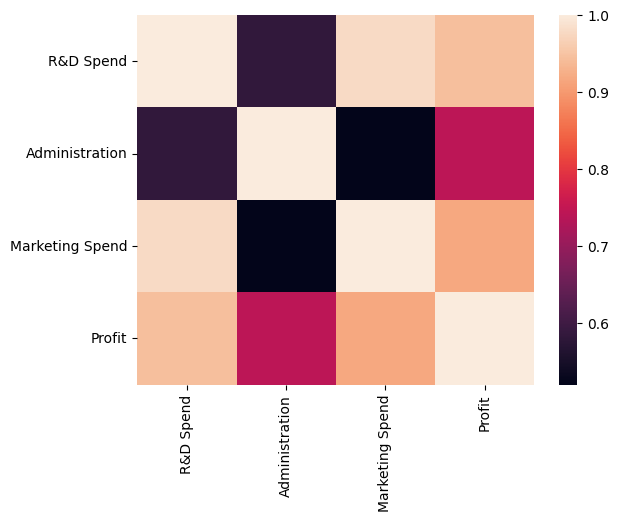

In [ ]:
# Select numerical columns
numerical_data = data.select_dtypes(include=np.number)

# Calculate correlation matrix for numerical columns
correlation_matrix = numerical_data.corr()

# Plot heatmap
sns.heatmap(correlation_matrix)

In [ ]:
#encoding catgorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['State'] = le.fit_transform(data['State'])
data


#splitting the data into train and test set
from sklearn.model_selection import train_test_split

# Define X and y first
X = data[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y = data['Profit']

# Then split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
#fitting linear regression model to training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#predicting the test set results
y_pred = regressor.predict(X_test)
print(y_pred)

[ 89624.88499983  88261.44060358  94728.57723845 176034.49990954
  83234.84214495 110393.04058199 131831.18880607  91307.52461765
 164414.26754671  53585.35570743  66786.11950078 150921.89704628
 126746.78121459  59174.341725   177341.80724482  75139.98127599
 118605.9491146  164403.24374731 171336.34862472 181885.06087421
 118762.26624783  85504.5201526  181345.84072646  83979.76201107
 104839.00200137 101067.00608604  53722.31401539  56706.45386115
  68732.18107141 209811.34272095 121136.34391499 111557.54775873
 101309.70393418 138315.39958078  63806.10546728 108690.79660343
 185830.38310114 171796.58186122 174997.97325294 118029.33822338
  96553.52264734 165281.03076793 107557.31012676  50557.29080259
 116871.82636073  58469.02312669 158771.35516035  78902.17488961
 160082.45834529 131494.74562654 185233.67354482 174962.79318566
  93579.64586335  78164.61392891 180561.94494338  84821.87449117
 143256.92009399 170435.21728058  84188.13777206 105128.89266268
 142016.17711741  52352.6

In [ ]:
#calculating the coefficients
print(regressor.coef_)

[ 5.27572958e-01  8.44490415e-01  1.06639226e-01 -3.54869857e+02]


In [ ]:
#calculating the intercept
q = regressor.intercept_
print(q)

-51144.72642572201


In [ ]:
#calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9112595959622046